In [ ]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# В первой части работы вам предстоит создать и обучить модель на основе полносвязной нейронной сети, аналогичной той,
# что вы уже обучали в первом семестре вручную: сети с одним скрытым слоем и логистической функцией активации.
# В качестве обучающего набора будем использовать уже известный нам набор MNIST.

# Класс полносвязной нейронной сети.
# Необходимо реализовать полносвязную нейронную сеть с одним скрытым слоем
# с логистической функцией активации на скрытом слое и SoftMax на выходном слое.
# Схема сети: Линейный слой -> Логическая функция -> Линейный слой -> SoftMax
# Сеть должна классифицировать черно-белые картинки с цифрами (0-9) размера 28х28 пискселей из набора данных MNIST.
# Подумайте, какую функцию потерь будете использовать при обучении: от этого будет зависеть функция на последнем слое.
# Разберитесь в функциях потерь CrossEntropyLoss, NLLLoss, а также в функцих активации LogSoftmax и Softmax по документации.
# После успешной реализации требуемой сети, попробуйте поиграть с количеством нейронов, слоев, типами функций активации.
# Какой максимальной точности на тестовой выборке удалось достичь?
class FullyConnectedNet(nn.Module):

    def __init__(self):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.nl1 = nn.Linear(28 * 28, 256) # входной слой
        self.act1 = nn.Sigmoid() # функция активации этого слоя
        self.nl2 = nn.Linear(256, 10) # скрытый слой
        self.act_final = nn.LogSoftmax(dim=1) # его функция активации 
        # ===============

    # Метод для выполнения прямого распространения сигнала, необходимо заполнить
    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x = self.act1(self.nl1(x))
        x = self.act_final(self.nl2(x))
        return x
        # ===============

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
# Размер батчей, как правило, варьируется от 8 до 64
BATCH_SIZE = 64

# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = FullyConnectedNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.SGD()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/train/MNIST/raw/train-images-idx3-ubyte.gz to ./data/train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/train/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/test/MNIST/raw/train-images-idx3-ubyte.gz to ./data/test/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/test/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/test/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/test/MNIST/raw



AttributeError: ignored

In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        batch = batch.reshape(batch.shape[0], -1).to(device)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.42290592193603516
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.2614923417568207
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.38037651777267456
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.19008247554302216
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.16628529131412506
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.10345552116632462
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.1670190393924713
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.037116121500730515
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.19032874703407288
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.14857402443885803


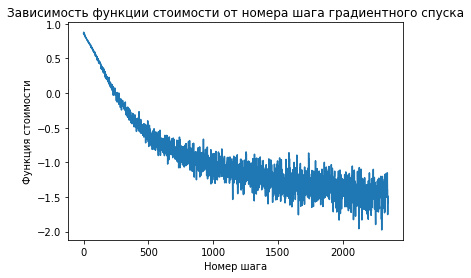

In [ ]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.reshape(len(train_data), -1).to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.reshape(len(test_data), -1).to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.9356666666666666
Точность (accuracy) на тестовой выборке: 0.9348


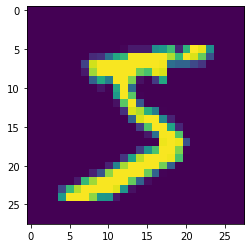

In [ ]:
plt.imshow(train_features[0].view(28,28))
plt.show()